In [1]:
#python

In [2]:
import sympy as sym
from sympy.plotting import plot

In [3]:
x,a,b = sym.symbols("x,a,b")

In [4]:
pa = ((x-b)/(a-b)).subs(a,-1).subs(b,1)
pb = ((x-a)/(b-a)).subs(a,-1).subs(b,1)

dpa = sym.diff(pa)
dpb = sym.diff(pb)

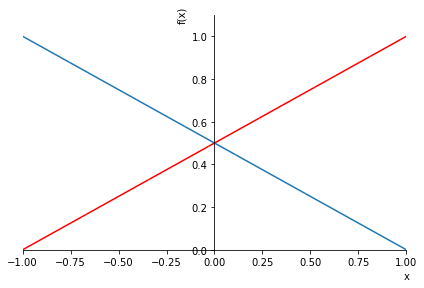

In [5]:
p1 = plot(pa,xlim=(-1,1),ylim=(0,1.1),show=False)
p1.append(plot(pb,line_color ='red',show=False)[0])
p1.show()

$$A^e_{AB} = \int \phi_A' \phi_B'\,dx$$

In [11]:
a1 = sym.integrate(dpa*dpa,(x,-1,1))
a2 = sym.integrate(dpa*dpb,(x,-1,1))
a3 = sym.integrate(dpb*dpa,(x,-1,1))
a4 = sym.integrate(dpb*dpb,(x,-1,1))
Ae = sym.Matrix([[a1,a2],[a3,a4]])
Ae

Matrix([
[ 1/2, -1/2],
[-1/2,  1/2]])

$$C^e_{AB} = \int \phi_A \phi_B\,dx$$

In [12]:
c1 = sym.integrate(pa*pa,(x,-1,1))
c2 = sym.integrate(pa*pb,(x,-1,1))
c3 = sym.integrate(pb*pa,(x,-1,1))
c4 = sym.integrate(pb*pb,(x,-1,1))
Ce = sym.Matrix([[c1,c2],[c3,c4]])
Ce

Matrix([
[2/3, 1/3],
[1/3, 2/3]])

$$K^e = \alpha A^e + \gamma C^e$$